In [1]:
from keras.layers import Dense, Input, Lambda, Conv2D, Reshape
from keras.optimizers import adam
from keras.losses import mse
from keras.datasets import mnist, fashion_mnist
from keras.models import Model

import numpy as np
import matplotlib.pyplot as plt

/home/aidan/anaconda3/envs/py3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from numpy.random import seed
seed(0)
from tensorflow import set_random_seed
set_random_seed(0)

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
def process(arr):
    arr = arr.astype('float32') / arr.max()
    return arr

x_train = process(x_train)
x_test = process(x_test)

In [5]:
input_shape = (x_train.shape[1], x_train.shape[2])
filter_num = 10
latent_dim = 3
batch_size = 100
epochs = 50

In [6]:
e_input = Input(shape=input_shape)
e_i = Reshape((input_shape[0], input_shape[1], 1))(e_input)
e_h = Conv2D(filter_num, (5,5), padding="same", activation="relu")(e_i)
e_h = Conv2D(filter_num, (3,3), padding="same", activation="relu")(e_h)
e_r = Reshape((28*28*filter_num, ))(e_h)
e_m = Dense(latent_dim, activation="relu")(e_r)
e_s = Dense(latent_dim, activation="relu")(e_r)

In [7]:
def sample(args):
    z_mean, z_log_sigma = args
    return z_mean + z_log_sigma * 0

latent_space = Lambda(sample)([e_m, e_s])

In [8]:
d_h = Dense(28*28, activation="relu")(latent_space)
d_r = Reshape((28, 28, 1))(d_h)
d_h = Conv2D(filter_num, (3, 3), padding="same", activation="relu")(d_h)
d_h = Conv2D(filter_num, (5, 5), padding="same", activation="relu")(d_h)
d_o = Conv2D(1, (1, 1), activation="sigmoid")(d_h)
d_out = Reshape((28, 28))(d_o)

In [9]:
cae = Model(e_input, d_out)

encoder = Model(e_input, e_m)

In [10]:
cae.compile(optimizer="adam", loss="mse", metrics=['mae', 'acc'])
cae.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28)       0                                            
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 28, 28, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 10)   260         reshape_1[0][0]                  
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 28, 28, 10)   910         conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (

In [11]:
history = cae.fit(x_train, x_train,
        batch_size=batch_size,
        epochs=epochs,
        shuffle=True,
        validation_data=(x_test, x_test)
      )

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 8s 133us/step - loss: 0.0757 - mean_absolute_error: 0.1629 - acc: 0.0955 - val_loss: 0.0618 - val_mean_absolute_error: 0.1361 - val_acc: 0.0763
Epoch 2/50
60000/60000 [==============================] - 7s 117us/step - loss: 0.0613 - mean_absolute_error: 0.1352 - acc: 0.0766 - val_loss: 0.0610 - val_mean_absolute_error: 0.1344 - val_acc: 0.0789
Epoch 3/50
60000/60000 [==============================] - 7s 116us/step - loss: 0.0608 - mean_absolute_error: 0.1345 - acc: 0.0806 - val_loss: 0.0606 - val_mean_absolute_error: 0.1364 - val_acc: 0.0835
Epoch 4/50
60000/60000 [==============================] - 7s 118us/step - loss: 0.0605 - mean_absolute_error: 0.1339 - acc: 0.0812 - val_loss: 0.0603 - val_mean_absolute_error: 0.1356 - val_acc: 0.0816
Epoch 5/50
60000/60000 [==============================] - 7s 116us/step - loss: 0.0602 - mean_absolute_error: 0.1333 - acc: 0.0832 - val_loss:

60000/60000 [==============================] - 7s 118us/step - loss: 0.0562 - mean_absolute_error: 0.1253 - acc: 0.1408 - val_loss: 0.0560 - val_mean_absolute_error: 0.1253 - val_acc: 0.1421
Epoch 42/50
60000/60000 [==============================] - 7s 117us/step - loss: 0.0563 - mean_absolute_error: 0.1253 - acc: 0.1401 - val_loss: 0.0559 - val_mean_absolute_error: 0.1252 - val_acc: 0.1414
Epoch 43/50
60000/60000 [==============================] - 7s 118us/step - loss: 0.0561 - mean_absolute_error: 0.1251 - acc: 0.1422 - val_loss: 0.0559 - val_mean_absolute_error: 0.1266 - val_acc: 0.1437
Epoch 44/50
60000/60000 [==============================] - 7s 115us/step - loss: 0.0561 - mean_absolute_error: 0.1250 - acc: 0.1410 - val_loss: 0.0562 - val_mean_absolute_error: 0.1221 - val_acc: 0.1409
Epoch 45/50
60000/60000 [==============================] - 7s 113us/step - loss: 0.0561 - mean_absolute_error: 0.1249 - acc: 0.1426 - val_loss: 0.0560 - val_mean_absolute_error: 0.1277 - val_acc: 0.14

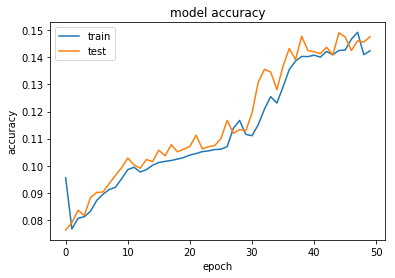

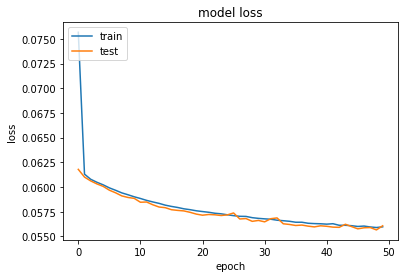

In [12]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

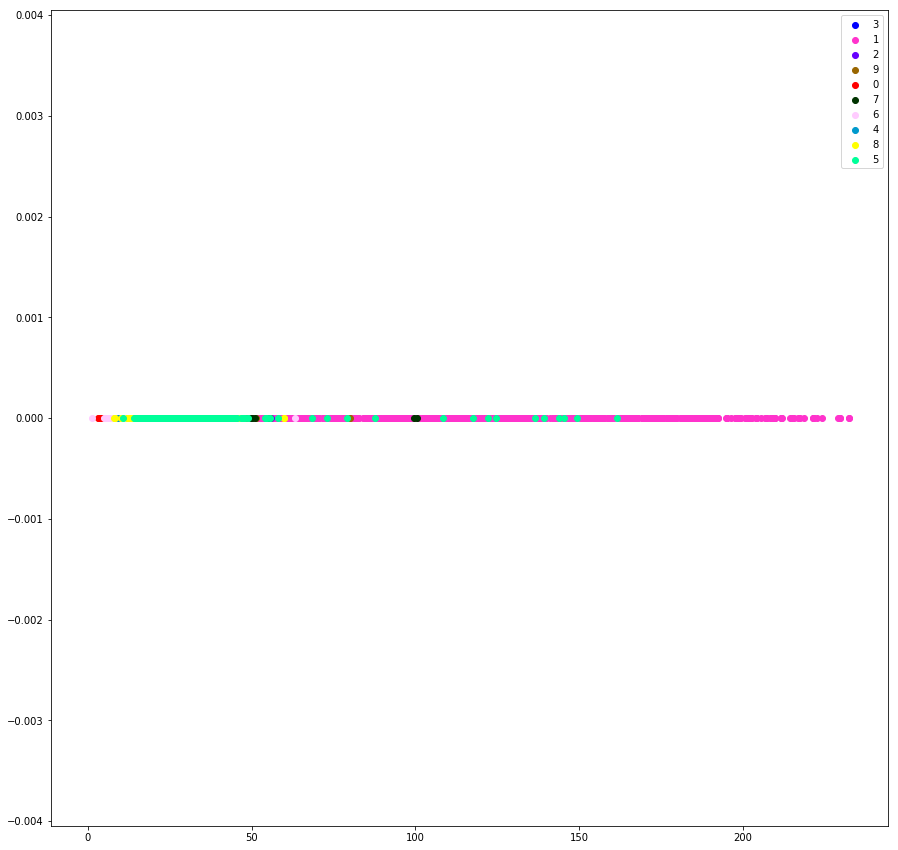

In [13]:
class_map_fashion = {
    0: "T-Shirt",
    1: "Pants",
    2: "Sweater",
    3: "Dress",
    4: "Jacket",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Shoe"
}

class_map_numbers = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9"
}

class_map = class_map_numbers

index_map = {
    class_map[0]: [],
    class_map[1]: [],
    class_map[2]: [],
    class_map[3]: [],
    class_map[4]: [],
    class_map[5]: [],
    class_map[6]: [],
    class_map[7]: [],
    class_map[8]: [],
    class_map[9]: []
}

color_map = {
    class_map[0]: "#ff0000",
    class_map[1]: "#ff33cc",
    class_map[2]: "#6600ff",
    class_map[3]: "#0000ff",
    class_map[4]: "#0099cc",
    class_map[5]: "#00ff99",
    class_map[6]: "#ffccff",
    class_map[7]: "#003300",
    class_map[8]: "#ffff00",
    class_map[9]: "#996600"
}

x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
for index, i in enumerate(y_test):
    elem_class = class_map[i]
    elem_list = index_map[elem_class]
    elem_list.append(index)

fig, ax = plt.subplots(figsize=(15, 15))
for elem_class in index_map:
    elems = np.array([x_test_encoded[i] for i in index_map[elem_class]])
    ax.scatter(elems[:, 0], elems[:, 1], c=color_map[elem_class], label=elem_class)
    
ax.legend()
plt.show()

In [14]:
test = 8
img = x_test[test]
print(img.shape)

(28, 28)


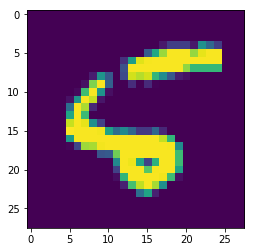

In [15]:
plt.imshow(img.reshape(28, 28))

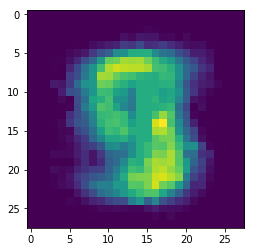

In [16]:
pred = cae.predict(img.reshape(1, 28, 28))
plt.imshow(pred.reshape(28, 28))